# Convolutional Neural Network
### Assignment-3 Task-1 DL6910
**Image classification using a MLFFNN with Deep CNN features for an image as the input to the MLFFNN, with VGG Net as Deep CNN**

### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import os
import cv2

In [7]:
print(cv2.__version__)

4.1.2


### Data

In [8]:
!unrar x "/content/Used data set - Copy.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Used data set - Copy.rar

Creating    Used data set - Copy                                      OK
Creating    Used data set - Copy/002.laysan albatross                 OK
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0001_545.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0002_1027.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0003_1033.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0004_930.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0005_565.jpg       1%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0006_702.jpg       1%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0012_696.jpg     

### Exploratory Data Analysis

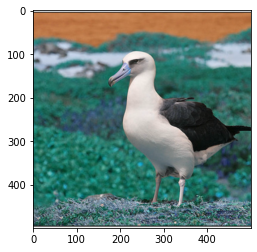

In [10]:
DATADIR="Used data set - Copy"
CATEGORIES=["002.laysan albatross","010.red winged blackbird","041.scissor tailed flycatcher","114.black throated sparrow",
            "126.nelson sharp tailed sparrow","130.tree sparrow","151.black capped vireo"]
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
    

In [11]:
print(img_array.shape)

(500, 500, 3)


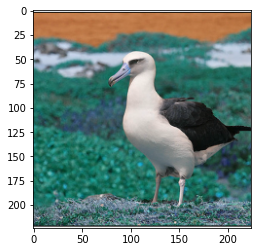

In [12]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array)
plt.show()

In [13]:
training_data=[]
img_size=224

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
                
            except Exception as e:
                pass
            
create_training_data()

In [14]:
print(len(training_data))

410


In [15]:
a=training_data[0][0]
a.shape

(224, 224, 3)

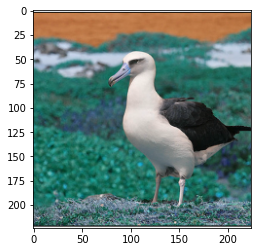

In [16]:
plt.imshow(a)

In [17]:
import random
random.shuffle(training_data)

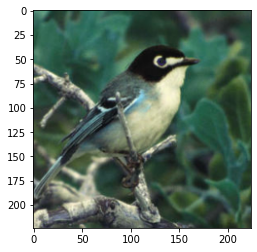

In [18]:
b=training_data[0][0]
plt.imshow(b)

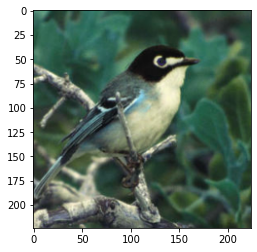

In [19]:
img_size=224
new_array=cv2.resize(b,(img_size,img_size))
plt.imshow(new_array)
plt.show()

In [20]:
X_vgg=[]
y_vgg=[]

for features,label in training_data:
    X_vgg.append(features)
    y_vgg.append(label)
    
X_vgg=np.array(X_vgg).reshape(-1,224,224,3)

### Saving the Data after Feature Engineering

In [21]:
import pickle

pickle_out=open("X_vgg.pickle","wb")
pickle.dump(X_vgg,pickle_out)
pickle_out.close()

pickle_out=open("y_vgg.pickle","wb")
pickle.dump(y_vgg,pickle_out)
pickle_out.close()

In [22]:
pickle_in=open("X_vgg.pickle","rb")
X=pickle.load(pickle_in)

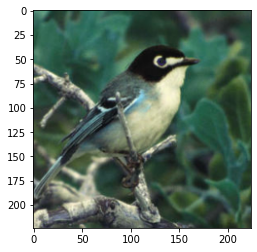

In [23]:
plt.imshow(X[0])

In [24]:
import pickle
X=pickle.load(open("X_vgg.pickle","rb"))
y=pickle.load(open("y_vgg.pickle","rb"))

### Categorization

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y=to_categorical(y,7)

In [27]:
y[0]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [28]:
X=X/255

In [29]:
s=X[0]
s.max()

0.996078431372549

In [30]:
X.shape

(410, 224, 224, 3)

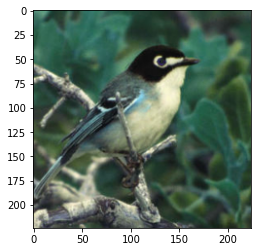

In [31]:

plt.imshow(s)

### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
X_train,X_validate,y_train,y_validate=train_test_split(X_train,y_train,test_size=0.125,random_state=142)

In [35]:
X_train.shape

(287, 224, 224, 3)

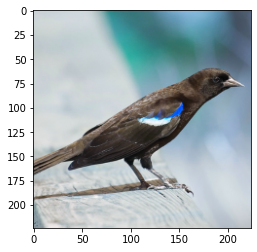

In [36]:
plt.imshow(X_train[0])

In [37]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [38]:
X_validate.shape

(41, 224, 224, 3)

In [39]:
X_test.shape

(82, 224, 224, 3)

### Saving Data after Categorization and Train Test Split
Saving data at regular interval is good as it avoids doing fresh start.

In [40]:
import pickle

pickle_out=open("X_train_vgg.pickle","wb")
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out=open("y_train_vgg.pickle","wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()

pickle_out=open("X_validate_vgg.pickle","wb")
pickle.dump(X_validate,pickle_out)
pickle_out.close()

pickle_out=open("y_validate_vgg.pickle","wb")
pickle.dump(y_validate,pickle_out)
pickle_out.close()


pickle_out=open("X_test_vgg.pickle","wb")
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out=open("y_test_vgg.pickle","wb")
pickle.dump(y_test,pickle_out)
pickle_out.close()

In [41]:
import pickle
X_train=pickle.load(open("X_train_vgg.pickle","rb"))
y_train=pickle.load(open("y_train_vgg.pickle","rb"))

X_validate=pickle.load(open("X_validate_vgg.pickle","rb"))
y_validate=pickle.load(open("y_validate_vgg.pickle","rb"))

X_test=pickle.load(open("X_test_vgg.pickle","rb"))
y_test=pickle.load(open("y_test_vgg.pickle","rb"))


In [ ]:
X_train.shape

(287, 224, 224, 3)

### Importing Tensorflow & Keras Libraries

In [51]:
import tensorflow as tf
import math 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.backend import l2_normalize
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD

## VGG Net Architecture

In [52]:
# Model Making

model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))

model.add(Conv2D(filters=64,kernel_size=(1,1),activation='relu'))


model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))  #1
model.add(BatchNormalization())


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))

model.add(Conv2D(filters=128,kernel_size=(1,1),activation='relu'))

model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same')) #2
model.add(BatchNormalization())


model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))

model.add(Conv2D(filters=256,kernel_size=(1,1),activation='relu'))

model.add(Conv2D(filters=256,kernel_size=(1,1),activation='relu'))


model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same')) #3
model.add(BatchNormalization())
          
model.add(Conv2D(filters=512,kernel_size=(1,1),activation='relu'))

model.add(Conv2D(filters=512,kernel_size=(1,1),activation='relu'))

model.add(Conv2D(filters=512,kernel_size=(1,1),activation='relu'))

          
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same')) #4
model.add(BatchNormalization())        
model.add(Conv2D(filters=512,kernel_size=(1,1),activation='relu'))

model.add(Conv2D(filters=512,kernel_size=(1,1),activation='relu'))

model.add(Conv2D(filters=512,kernel_size=(1,1),activation='relu'))

          
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same')) #5


model.add(AveragePooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(BatchNormalization())
model.add(Flatten( ))

model.add(Dropout(0.5))

model.add(Dense(490))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

#output layer
model.add(Dense(7,activation='softmax'))

epochs = 100
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=True)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy'], loss_weights=[1], optimizer=sgd, metrics=['accuracy'])


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 222, 222, 64)      4160      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 111, 111, 64)      256       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 109, 109, 128)     73856     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 109, 109, 128)     16512     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 55, 55, 128)      

### Training the Model

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
history = model.fit(X_train, y_train, validation_data=(X_validate,y_validate), epochs=epochs, batch_size=16, callbacks=[lr_sc])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
Epoch 1/100
18/18 [==============================] - 8s 452ms/step - loss: 1.9699 - accuracy: 0.1324 - val_loss: 1.9439 - val_accuracy: 0.1707 - lr: 0.0100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.01.
Epoch 2/100
18/18 [==============================] - 5s 265ms/step - loss: 1.9239 - accuracy: 0.1812 - val_loss: 1.9470 - val_accuracy: 0.1951 - lr: 0.0100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.01.
Epoch 3/100
18/18 [==============================] - 5s 265ms/step - loss: 1.9081 - accuracy: 0.1951 - val_loss: 1.9485 - val_accuracy: 0.1951 - lr: 0.0100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.01.
Epoch 4/100
18/18 [==============================] - 5s 265ms/step - loss: 1.8321 - accuracy: 0.2439 - val_loss: 1.9585 - val_accuracy: 0.1951 - lr: 0.0100

Epoch 00005: LearningRateScheduler reducing learning rate to 0.01.
Epoch 5/100
18/18 [=================

### Evaluation

In [55]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy,lr
0,1.969868,0.132404,1.943918,0.170732,0.010000
1,1.923946,0.181185,1.946961,0.195122,0.010000
2,1.908102,0.195122,1.948515,0.195122,0.010000
3,1.832085,0.243902,1.958464,0.195122,0.010000
4,1.754235,0.327526,1.964708,0.195122,0.010000
...,...,...,...,...,...
95,0.047651,0.972125,1.481443,0.560976,0.006127
96,0.018354,0.993031,1.532841,0.707317,0.006127
97,0.029444,0.989547,1.406345,0.682927,0.006127
98,0.009677,1.000000,1.401033,0.682927,0.006127


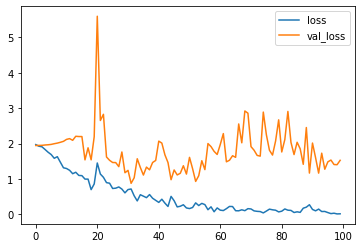

In [56]:

metrics[['loss','val_loss']].plot()

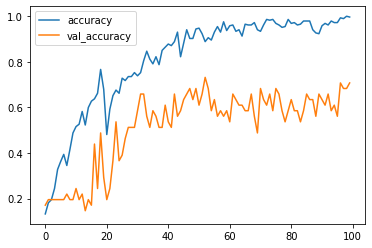

In [57]:
metrics[['accuracy','val_accuracy']].plot()

In [58]:
model.metrics_names

['loss', 'accuracy']

### Saving the Final Trained Model  

In [59]:
model.save('DL_ASSIGN_3_TASK_1_VGG_net.h5')

In [60]:
from tensorflow.keras.models import load_model

In [61]:
Final_model=load_model('DL_ASSIGN_3_TASK_1_VGG_net.h5')

In [62]:
a=X_test[:5]
b=y_test[:5]
c=Final_model.predict_classes(a)
#c=np.argmax(Final_model.predict(a), axis=-1)
c=to_categorical(c,7)
c

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#### Classification Report & Confusion Matrix

In [63]:
from sklearn.metrics import classification_report,multilabel_confusion_matrix

In [64]:
predictions=Final_model.predict_classes(X_test)
predictions=to_categorical(predictions,7)

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       1.00      0.83      0.91        12
           2       0.82      0.64      0.72        14
           3       0.50      0.62      0.55        13
           4       0.50      0.23      0.32        13
           5       0.22      1.00      0.36         4
           6       0.57      0.36      0.44        11

   micro avg       0.61      0.61      0.61        82
   macro avg       0.64      0.64      0.59        82
weighted avg       0.69      0.61      0.62        82
 samples avg       0.61      0.61      0.61        82



In [66]:
predictions[0]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [67]:
y_test[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [68]:
print(multilabel_confusion_matrix(y_test,predictions))

[[[65  2]
  [ 3 12]]

 [[70  0]
  [ 2 10]]

 [[66  2]
  [ 5  9]]

 [[61  8]
  [ 5  8]]

 [[66  3]
  [10  3]]

 [[64 14]
  [ 0  4]]

 [[68  3]
  [ 7  4]]]


#### Prediction

In [69]:
multilabel_confusion_matrix(y_test,predictions)[0]

array([[65,  2],
       [ 3, 12]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


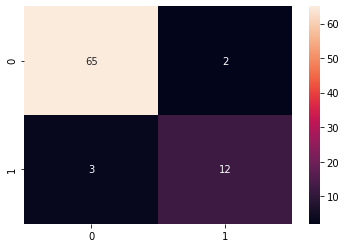

In [70]:
import seaborn as sns
sns.heatmap(multilabel_confusion_matrix(y_test,predictions)[0],annot=True)

## Done!
Model performed Good